In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive/')
loc = 'drive/MyDrive/Shtem2023/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


a LiNeAr MoDeL:

input of $d$ dimensions $X = [x_1, x_2, x_3, ... , x_d]$

trying to predict single dimension (a.k.a. scalar) $Y$

a linear model will fit (or attempt to fit) $d+1$ parameters, $P = [p_0, p_1, ... p_d]$, as follows:

$\hat{Y} = p_0 + x_1p_1 + x_2p_2 + ... + x_dp_d$

where the hat on the $Y$ means 'approximation' or 'guess'.

And the reason why we have one more $p$ than $x$ value is because of the intercept.

Recall $y = mx+b$ only has one independent variable but two parameters $(m,b)$.

So essentially, in multiple dimensions, when trying to fit a linear model, we just come up with slopes for every input and still add an intercept.

this can also be $\hat{Y} = [1 \ \ X]^T P$

In [ ]:
N = 2048
indim = 2
X = np.random.randn(N,indim)*3
centerList = [[1,3],[-3,0]]
centers = np.asarray(centerList)

Y = np.zeros((N,3))

def dist(a,b):
  return np.sqrt(
      np.sum(
          (a-b)**2
          )
      )


for i in range(N):
  dist0 = dist( X[i], centers[0])
  dist1 = dist( X[i], centers[1])
  if dist0 < 2:
    Y[i,0] = 1
  elif dist1 < 2:
    Y[i,1] = 1
  else:
    Y[i,2] = 1



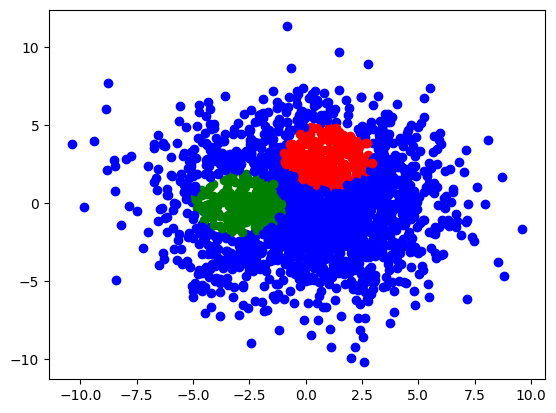

In [ ]:
N = 0
cs = ['r','g','b']
for k in Y:
  for j in range(3):
    if k[j] == 1:
      plt.scatter(X[N,0],X[N,1],color = cs[j])
  N = N + 1




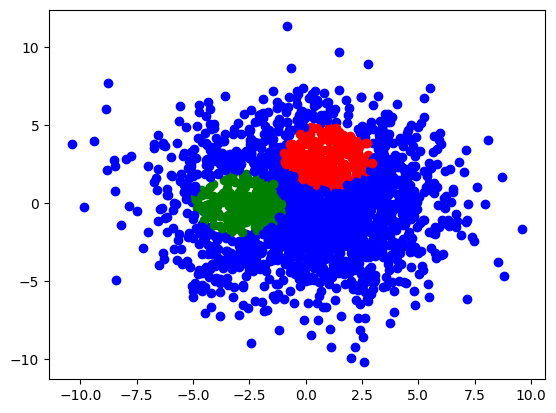

In [ ]:
for i in range(N):

  cs = ['r','g','b']
  plt.scatter(X[i,0],X[i,1],color = cs[np.argmax(Y[i])])

In [ ]:
l1 = 4
layer1 = np.zeros((l1,1))
l1params = []
for i in range(indim+1):
  l1params.append([])
  for j in range(l1):
    l1params[-1].append(np.random.rand())
l1p = np.array(l1params)


In [ ]:
l1p

array([[0.94438331, 0.58892816, 0.17135354, 0.02728658],
       [0.9559526 , 0.18381851, 0.0226611 , 0.35409857],
       [0.11526629, 0.28122158, 0.44876217, 0.76397299]])

In [ ]:
# making layer 1
#X[0]*l1p[:-1] + l1p[:-1]

In [ ]:
#x= x.reshape(1000,1)
#y= y.reshape(1000,1)

input_shape = X[0].shape
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=10,input_shape=input_shape)])
model.add(tf.keras.layers.Dense(units=15, activation = 'softmax'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
model.add(tf.keras.layers.Dense(units=3, activation = 'softmax'))
# after you create your model it's
# always a good habit to print out it's summary
model.summary()
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              # MAE error is good for
              # numerical predictions
              loss='categorical_crossentropy')
losses = model.fit(X, Y,
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=15,  # total epoch
                   validation_split=0.2
                   )

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 10)                30        
                                                                 
 dense_81 (Dense)            (None, 15)                165       
                                                                 
 dense_82 (Dense)            (None, 10)                160       
                                                                 
 dense_83 (Dense)            (None, 3)                 33        
                                                                 
Total params: 388
Trainable params: 388
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
7/7 [==============================] - 1s 37ms/step - loss: 1.1112 - val_loss: 1.0197
Epoch 2/15
7/7 [==============================] - 0s 9ms/step - loss: 0.9685 - val_loss: 0